**Disclaimer:** This page is **not** a comprehensive reference of `pandas` library, it only covers a few parts of it.

In [1]:
import pandas as pd

In [2]:
s = pd.Series([11, 22, 33, 44, 55], index=pd.Index(['1', '2', '3', '4', '5'], name='day'))
s

day
1    11
2    22
3    33
4    44
5    55
dtype: int64

In [3]:
s.index

Index(['1', '2', '3', '4', '5'], dtype='object', name='day')

In [4]:
s.values

array([11, 22, 33, 44, 55])

In [5]:
s[['1', '2']]

day
1    11
2    22
dtype: int64

In [6]:
df = pd.DataFrame(
    [[1, 'Apple', 3.14], [2, 'Pear', 64], [3, 'Lemon', 77]], 
    columns=['Idx', 'Fruit', 'Value'], 
    index=['a1', 'p1', 'l1']
)
df

,Idx,Fruit,Value
a1,1,Apple,3.14
p1,2,Pear,64.00
l1,3,Lemon,77.00


In [7]:
df.index

Index(['a1', 'p1', 'l1'], dtype='object')

In [8]:
df.values

array([[1, 'Apple', 3.14],
       [2, 'Pear', 64.0],
       [3, 'Lemon', 77.0]], dtype=object)

In [9]:
df[['Idx', 'Fruit']]

,Idx,Fruit
a1,1,Apple
p1,2,Pear
l1,3,Lemon


In [10]:
df['Idx']

a1    1
p1    2
l1    3
Name: Idx, dtype: int64

In [11]:
df[df['Idx'] % 2 == 1]

,Idx,Fruit,Value
a1,1,Apple,3.14
l1,3,Lemon,77.00


In [12]:
df.iloc[1:]

,Idx,Fruit,Value
p1,2,Pear,64.0
l1,3,Lemon,77.0


In [13]:
df.loc['p1']

Idx         2
Fruit    Pear
Value    64.0
Name: p1, dtype: object

In [14]:
df.drop(['p1'])

,Idx,Fruit,Value
a1,1,Apple,3.14
l1,3,Lemon,77.00


In [15]:
df2 = df.drop(['Value'], axis='columns') # e.g. same as "df2 = df.copy()" and then "del df2['Fruit']"
df2

,Idx,Fruit
a1,1,Apple
p1,2,Pear
l1,3,Lemon


In [16]:
df2.T

,a1,p1,l1
Idx,1,2,3
Fruit,Apple,Pear,Lemon


In [17]:
df2.index = pd.Index(df2['Fruit'])
df2

,Idx,Fruit
Fruit,,
Apple,1,Apple
Pear,2,Pear
Lemon,3,Lemon


In [18]:
df2.reindex(['Lemon', 'Pear', 'Apple'])

,Idx,Fruit
Fruit,,
Lemon,3,Lemon
Pear,2,Pear
Apple,1,Apple


In [19]:
df3 = pd.DataFrame({'Name': ['john', 'brendon'], 'Age': [25, pd.NA]})
pd.isnull(df3)

,Name,Age
0,False,False
1,False,True


In [20]:
df3.dropna()

,Name,Age
0,john,25


In [21]:
df3['Name'].map(str.title)

0       John
1    Brendon
Name: Name, dtype: object

In [22]:
df3.Name.str.title()

0       John
1    Brendon
Name: Name, dtype: object

In [23]:
df3.applymap(lambda v: v[0:3] + '...' if isinstance(v, str) else v)

,Name,Age
0,joh...,25
1,bre...,<NA>


2    2
4    2
8    1
Name: cores, dtype: int64


<AxesSubplot:ylabel='Frequency'>

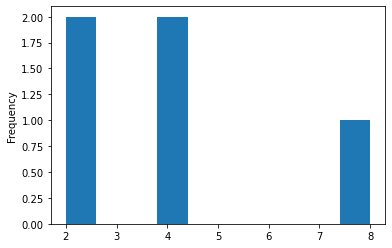

In [24]:
df4 = pd.DataFrame({'server': ['s1', 's2', 's3', 's4', 'l1'], 'cores': [2, 4, 4, 2, 8]})
print(df4['cores'].value_counts())
df4['cores'].plot.hist()